In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
%matplotlib inline
from wordcloud import WordCloud
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re



In [17]:
symbols = ['GME','AMC','BB','CLNE','CLOV','CLF','TLRY','NOK','TKAT','CRSR','OCGN','LFMD']

df = pd.read_csv('combined_csv.csv')
df.head()

,Unnamed: 0,Author,Comment,Score,timestamp
0,0,InMuskWeTruskk,Just went to the supermarket and it was stocke...,76,8/2/2021 7:29
1,1,Donkeycow15,Unpopular opinion - we need bears so we can ha...,61,8/2/2021 5:21
2,2,NervousTumbleweed,I dont want to go to work today,61,8/2/2021 5:46
3,3,spyaintnobitch,JPow can never turn off the printers now. We a...,49,8/2/2021 6:47
4,4,toydan,Daily reminder\n\n#The dollar is a depreciatin...,48,8/2/2021 7:08


In [18]:
search_list = symbols

df['symbols'] = df.Comment.str.extract('({0})'.format('|'.join(search_list)), flags=re.IGNORECASE)
result = df[~pd.isna(df.symbols)]

result


,Unnamed: 0,Author,Comment,Score,timestamp,symbols
5,5,Kant_touch,"The year is 2040, Ive just blown up my account...",47,8/2/2021 9:13,bb
93,93,CJ_2013,Wow. Im officially above water in CLOV. Is thi...,12,8/2/2021 12:56,CLOV
95,95,xjayroox,CLOV owners celebrating only being down 27% now,12,8/2/2021 13:16,CLOV
98,98,thegodrf,"$CRSR time tomorrow , crush earnings and stay ...",11,8/2/2021 14:09,CRSR
122,122,Maximum9199,"Member BB, ohhh I Member",9,8/2/2021 6:19,BB
...,...,...,...,...,...,...
7429,104,reno222,"I'm pretty fucking drunk right now, it's 12:20...",11,8/17/2021 7:20,amc
7585,260,mMounirM,CRSR really is a piece of shit,10,8/17/2021 9:02,CRSR
7621,296,bigtexas91,Guy in the stall next to me is bawling his eye...,9,8/17/2021 12:05,bb
7647,322,Slave_to_the_bets,"$36K today, first on SPY Puts then on calls. N...",8,8/17/2021 14:52,bb


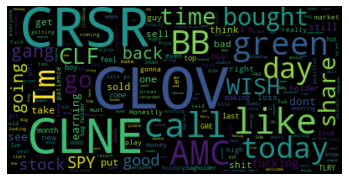

In [4]:
# Create stopword list:
stopwords = set(stopwords.words('english'))
textt = " ".join(comment for comment in result.Comment)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()


In [5]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
result = result[result['Score'] != 10]
result['sentiment'] = result['Score'].apply(lambda rating : +1 if rating > 10 else -1)



<ipython-input-5-f15584d9753f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
dfNew = result[['Comment','sentiment']]
dfNew.head()


,Comment,sentiment
5,"The year is 2040, Ive just blown up my account...",1
93,Wow. Im officially above water in CLOV. Is thi...,1
95,CLOV owners celebrating only being down 27% now,1
98,"$CRSR time tomorrow , crush earnings and stay ...",1
122,"Member BB, ohhh I Member",-1


In [7]:
# random split train and test data
index = result.index
dfNew['random_number'] = np.random.randn(len(index))
train = dfNew[dfNew['random_number'] <= 0.8]
test = dfNew[dfNew['random_number'] > 0.8]

<ipython-input-7-4955e1c5388e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Comment'])
test_matrix = vectorizer.transform(test['Comment'])

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [10]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [11]:
lr.fit(X_train,y_train)


LogisticRegression()

In [12]:
predictions = lr.predict(X_test)

In [13]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)


array([[33, 14],
       [ 8, 23]], dtype=int64)

In [14]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.80      0.70      0.75        47
           1       0.62      0.74      0.68        31

    accuracy                           0.72        78
   macro avg       0.71      0.72      0.71        78
weighted avg       0.73      0.72      0.72        78

